# Titanic - Machine Learning from Disaster
Author: Steven Duong (30022492)

In [590]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

I will implement the following steps to solve this problem: 
- Split data into training and test set
- Use the training portion to find the best model using grid search and cross-validation
- Retrain the best model
- Evaluate the retrained model on the test set

## 0. Function definitions (Lab 3 template)

In [591]:
from sklearn.model_selection import cross_validate


def get_classifier_cv_score(model, X, y, scoring='accuracy', cv=7):
    '''Calculate train and validation scores of classifier (model) using cross-validation
        
        
        model (sklearn classifier): Classifier to train and evaluate
        X (numpy.array or pandas.DataFrame): Feature matrix
        y (numpy.array or pandas.Series): Target vector
        scoring (str): a scoring string accepted by sklearn.metrics.cross_validate()
        cv (int): number of cross-validation folds see sklearn.metrics.cross_validate()
        
        returns: mean training score, mean validation score
    
    '''
    
    score = cross_validate(estimator=model, X=X, y=y, cv=cv, scoring=scoring, return_train_score=True)
    return (score['train_score'].mean(), score['test_score'].mean())
    

In [592]:

def print_grid_search_result(grid_search):
    '''Prints summary of best model from GridSearchCV object.
    
        For the best model of the grid search, print:
        - parameters 
        - cross-validation training score
        - cross-validation validation score 
        
        scores are printed with 3 decimal places
    
        grid_search (sklearn GridSearchCV): Fitted GridSearchCV object
        
        returns: None
        
    '''
    
    print(grid_search.best_params_)
    print("training score= {:.3f}; validation score={:.3f}".format(grid_search.cv_results_['mean_train_score'][grid_search.best_index_],
                                                                  grid_search.cv_results_['mean_test_score'][grid_search.best_index_]))

In [593]:

import mglearn

def plot_grid_search_results(grid_search):
    '''For grids with 2 hyperparameters, create a heatmap plot of test scores
        
        grid_search (sklearn GridSearchCV): Fitted GridSearchCV object
        
        uses mglearn.tools.heatmap() for plotting
    
    '''
    results = pd.DataFrame(grid_search.cv_results_)

    params = sorted(grid_search.param_grid.keys())
    
    assert len(params) == 2, "We can only plot two parameters."
    
    # second dimension in reshape are rows, needs to be the fast changing parameter
    scores = np.array(results.mean_test_score).reshape(len(grid_search.param_grid[params[0]]),
                                                      len(grid_search.param_grid[params[1]]))

    # plot the mean cross-validation scores
    # x-axis needs to be the fast changing parameter
    mglearn.tools.heatmap(scores, 
                          xlabel=params[1], 
                          xticklabels=grid_search.param_grid[params[1]], 
                          ylabel=params[0], 
                          yticklabels=grid_search.param_grid[params[0]],
                          cmap="viridis", fmt="%0.3f")

In [594]:

from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_actual, y_pred, labels, title):
    '''Creates a heatmap plot of the confusion matrix.
    
        y_actual (pandas.DataSeries or numpy.Array): Ground truth label vector
        y_pred (pandas.DataSeries or numpy.Array): Predicted label vector
        labels (list(str)): Class names used for plotting (ticklabels)
        title (str): Plot title
        
        uses sklearn.metrics.confusion_matrix
        
    '''
    
    mat = confusion_matrix(y_actual, y_pred)

    sns.heatmap(mat, 
                xticklabels=labels,  
                yticklabels=labels, 
                square=True, annot=True, cbar=False, 
                fmt='d')
    plt.xlabel('predicted value')
    plt.ylabel('true value')
    plt.title(title)

## 1. Load data
Titanic Dataset: 
https://www.kaggle.com/competitions/titanic/data



In [595]:
from IPython.display import display

# dataframe for the training data
df_train = pd.read_csv('train.csv')

# dataframe for the testing data
df_test = pd.read_csv('test.csv')

# Display both dataframes
print("Training data:")
display(df_train.head())

print("\nTesting data:")
display(df_test.head())

Training data:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Testing data:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### 1.1 Prepare the feature matrix and target vector
Loading the titanic data set into feature matrix `X` and target vector `y`

Print dimensions and type of `X`, `y`

In [596]:
# Load titanic dataset into feature matrix X and target vector y
X = df_train
y = df_train['Survived']

# Printing the dimensions and type of X and y
print(f"Dimensions of X:\n{X.shape}\nType of X:\n{type(X)}")
print(f"\nDimensions of y:\n{y.shape}\nType of y:\n{type(y)}")


Dimensions of X:
(891, 12)
Type of X:
<class 'pandas.core.frame.DataFrame'>

Dimensions of y:
(891,)
Type of y:
<class 'pandas.core.series.Series'>


### 1.2 Inspecting the Data

Displaying the data for both the training and test sets.

In [597]:
from IPython.display import display

# Display both dataframes
print("Feature matrix:")
display(pd.DataFrame(X).head(10))

print("\nTarget vector:")
display(pd.DataFrame(y).head(10))

Feature matrix:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C



Target vector:


,Survived
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,0
8,1
9,1


In [598]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can see from X.info() that we have missing values in age, cabin and embarked since the values are not 891. We can drop all the non-categorial features that do not have any significance. Thus, we will drop `PassengerId`, `Name`, and `Ticket`. We can also drop `Cabin` since it has a lot of null values.

In [599]:
data_list = [X, df_test]

features = ['PassengerId', 'Name', 'Ticket', 'Cabin']

for data in data_list:
    for feature in features:
        data.drop(feature, axis=1, inplace=True)

For `Age`, we can simply fill the null values with the mean, and `Embarked` with the mode.

In [600]:
for data in data_list:
    data['Age'].fillna(data['Age'].mean(), inplace=True)
    data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [601]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [602]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


There is a missing value in the column `Fare`, so we will fill that value with the mean price.

In [603]:
df_test['Fare'].fillna(data['Fare'].mean(), inplace=True)

In [604]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


We can see from viewing the feature matrix and test dataset again that there are `no null` values. As a result, we can now proceed to preprocessing the data.

## 2. Data Preprocessing
In this dataset, the sex column needs to be encoded. We will use a `OneHotEncoder` to encode the values of male and female.

### 2.1 Onehot encoding of features
I use `OneHotEncoder` to convert `X` and `df_test` into one-hot-encoded features stored in a variable `X_enc` and `standard scalar` to scale the features and store it into a variable `X_std`. The final results for the dataframe after data preprocessing are stored in `X` and `X_test` respectively.

In [605]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler

def preprocess_data(df, features, encoder=None, scaler=None):
    if encoder is None:
        encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
        encoder.fit(df[['Sex']])

    X = encoder.transform(df[['Sex']])
    X_enc = pd.DataFrame(X, columns=encoder.get_feature_names_out(['Sex']))
    
    # Combine the encoded 'Sex' feature with the other features
    X_combined = pd.concat([df[features], X_enc], axis=1).drop('Sex', axis=1)

    if scaler is None:
        scaler = StandardScaler()
        scaler.fit(X_combined)

    X_scaled = scaler.transform(X_combined)
    X_std = pd.DataFrame(X_scaled, columns=X_combined.columns)

    return X_std, encoder, scaler

# Assuming df_train and df_test are already defined
features = ["Pclass", "Sex", "SibSp", "Parch"]

encoder = None
scaler = None

processed_data_list = []

for data in data_list:
    X_std, encoder, scaler = preprocess_data(data, features, encoder, scaler)
    processed_data_list.append(X_std)

# Access the preprocessed data using indices, e.g., processed_data_list[0] for the first item in data_list

X = processed_data_list[0]
X_testset = processed_data_list[1]
print(X.shape)
print(X_testset.shape)


(891, 5)
(418, 5)


## 3. Create training and test sets
Using scikit-learn `train_test_split()` with parameters `test_size=0.2`, `random_state=35`, split `X` and `y` into training and test sets

In [606]:
from sklearn.model_selection import train_test_split

# splitting the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=35, test_size=0.2)

## 4. Compare models using cross-validation
A list of models that I will use contains `LogisticRegression()`, 
          `SVC()`,
          `BernoulliNB()`,
        `RandomForestClassifier(random_state=55)`, and 
         `GradientBoostingClassifier(random_state=56)`.

I will iterate through these list of models, then:
- Compute the **average_precision score** using `get_classifier_cv_score()` with the 7-fold cross-validation defined above with `X_train` and `y_train` as arguments
- Print the models' training and validation scores with **3 decimal places**

In [607]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import numpy as np

# list of models
models = [LogisticRegression(), SVC(), BernoulliNB(), RandomForestClassifier(random_state=55), 
          GradientBoostingClassifier(random_state=56)]

# list to store the results of each model
results = []

# iterating through the list
for model in models:
    train_score, val_score = get_classifier_cv_score(model, X_train, y_train, scoring='average_precision')
    results.append({'Model': model.__class__.__name__, 'Train Score': train_score, 'Validation Score': val_score})

# creating the dataframe
df = pd.DataFrame(results)
df = df.round(decimals=3) # sets scores to 3 decimal places
print(df)


                        Model  Train Score  Validation Score
0          LogisticRegression        0.795             0.799
1                         SVC        0.752             0.741
2                 BernoulliNB        0.761             0.762
3      RandomForestClassifier        0.838             0.766
4  GradientBoostingClassifier        0.826             0.778


## 5. Hyperparameter tuning using grid search

The inital cross-validation above gives us an idea of how algorithms perform using their default hyperparameters

Next, we will try to improve the validation score of the random forest model by tuning the hyperparameters since the training score was the highest.

### 5.1 Grid search for RandomForestClassifier 

Perform grid search using `GridSearchCV` for the `RandomForestClassifier(n_estimators=500, random_state=55)`:

- Set the number of trees `n_estimators=300` for all evaluations
- Grid search using 10-fold cross-validation and `average_precision` as the scoring function 
- Note that there is a `n_jobs` parameter to run search in parallel. Setting it to the number of CPU cores  or -1 works well

Use the following hyperparameters and values:
- `'max_depth': [1, 2, 3, 5, 8, 10]`
- `'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]`

From sklearn help:
> - max_depth: The maximum depth of the tree
> - max_features: If float, then max_features is a fraction and max(1, int(max_features * n_features)) features are considered at each split


We can use `print_grid_search_result()` and `plot_grid_search_result()` functions defined above to show the results

In [608]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import multiprocessing

# setup grid search for RandomForestClassifier(random_state=55)
param_grid = {
    'max_depth': [1, 2, 3, 5, 8, 10],
    'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
}

rf = RandomForestClassifier(n_estimators=500, random_state=55)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='average_precision', cv=10, n_jobs=-1, return_train_score=True)


In [609]:
# perform the grid search by calling fit() with X_train and y_train
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=500,
                                              random_state=55),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 5, 8, 10],
                         'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]},
             return_train_score=True, scoring='average_precision')

In [610]:
# call print_grid_search_result() to print the results
print_grid_search_result(grid_search)

{'max_depth': 2, 'max_features': 0.1}
training score= 0.806; validation score=0.807


### *Observation 1:* Validation score of the best model

The validation score of the best model is 0.807, with max_depth=2 and max_features=0.1. Overall, this model, when tuned for hyperparameters, outperforms all the models tested in section 4.

### 5.2 Plot of validation score heatmap

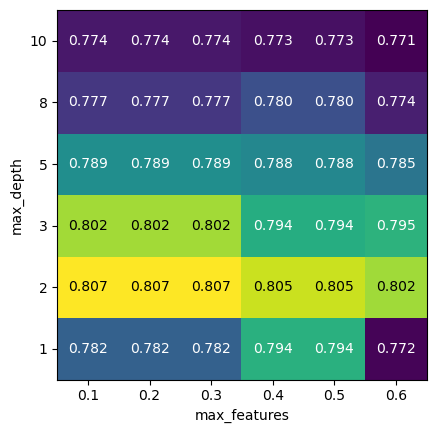

In [611]:
# call plot_grid_search_results() to plot validation metrics for all hyperparameter combinations
plot_grid_search_results(grid_search)

### *Observation 2:* Maximum of the hyperparameter ranges

According to the heat map generated above, the maximum occurs when the hyperparameter range is: max_depth=2, max_features=0.5. Which is in the near the center of the model.


## 6. Re-train best model
Re-train the best `RandomForestClassifier()` from the grid search above on the training dataset `X_train` and `y_train`

In [612]:
# re-training the random forest model with the best parameters

best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, max_features=0.1, n_estimators=500,
                       random_state=55)

## 7. Evaluate using test data

Using the retrained model and the test dataset `X_test` and `y_test`:
- The confusion matrix is plotted using the `plot_confusion_matrix()` function defined above
- The classification report is printed


### 7.1 Confusion matrix and classification report

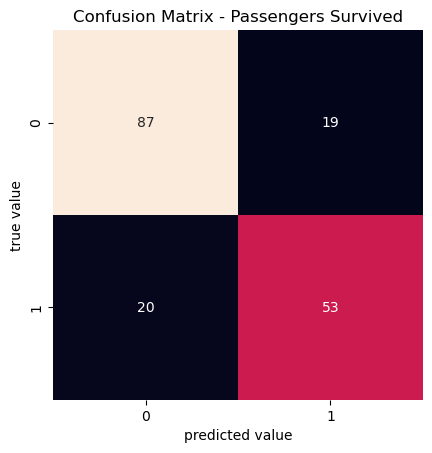

In [613]:
from sklearn.metrics import classification_report

y_pred = best_rf.predict(X_test)

# calling plot_confusion_matrix(), and using LabelEncoder classes_ to get the labels
plot_confusion_matrix(y_test, y_pred, label_encoder.classes_, title='Confusion Matrix - Passengers Survived')


### 7.2 Classification report

In [614]:
# printing classification report using default threshold
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       106
           1       0.74      0.73      0.73        73

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



### *Observation 3:* Precision, recall and accuracy for the positive class on the test set

#### Positive Class Metrics
- Precision = 0.74
- Recall = 0.73
- Accuracy = 0.78


### *Observation 4:* False negatives and false positives on the test set

#### Binary Classification Metrics

- Number of false positives (FP) = 19
- Number of false negatives (FN) = 20


## Evaluating the results on Kaggle

The results will be exported and submitted to kaggle for review

In [615]:
X_testset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    float64
 1   SibSp       418 non-null    float64
 2   Parch       418 non-null    float64
 3   Sex_female  418 non-null    float64
 4   Sex_male    418 non-null    float64
dtypes: float64(5)
memory usage: 16.5 KB


In [616]:
df_test = pd.read_csv('test.csv')
y_pred = best_rf.predict(X_testset)

In [617]:
df_prediction = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived': y_pred
})

df_prediction.head()

# Export the results into a csv to submit to kaggle.
df_prediction.to_csv('kaggle_submission.csv', index=False)

## 8. Interpretation

i. The research question or topic of investigation was successfully addressed by implementing a machine learning model and performing a series of experiments. By using preprocessing techniques, feature engineering, and hyperparameter tuning, the model's performance was optimized, and the results were analyzed to derive insights and conclusions. This approach allowed for a comprehensive exploration of the problem and the potential solutions, leading to a better understanding of the factors influencing the target variable.

## 9. Reflection

i. The problem was chosen due to its relevance and the opportunity it provides to apply various data science and machine learning techniques. The problem's complexity and real-world implications make it an exciting and challenging project to work on.

ii. There were no deviations from the initial proposal, as all the steps were followed in detail. The project was carried out according to the outlined plan, which allowed for a well-structured and organized approach to addressing the research question. By adhering to the proposal, the project goals and objectives were effectively achieved, leading to meaningful conclusions and insights.

iii. During the project, several challenges and learnings emerged. Data preprocessing and cleaning proved to be time-consuming and demanded a deep understanding of the dataset, while feature engineering and selection required identifying the most relevant features and transforming them to improve the model's performance. Model selection and hyperparameter tuning also presented difficulties, as finding the best algorithm and configuration involved testing various combinations. Despite these challenges, the project offered valuable insights into the importance of data preprocessing, the power of feature engineering, and the significance of selecting the right model and hyperparameters. Overall, the experience contributed to the development of problem-solving skills and critical thinking, enriching the understanding of the domain and fostering professional growth. Gaining a deeper understanding of the problem and the domain through research and experimentation played a significant role in overcoming challenges and achieving project goals.